# Лабораторна робота №3. Нелінійна багатовимірна безумовна оптимізація

Виконав - Огоновський Олександр

**Мета**:  навчитися розв’язувати задачі одновимірної нелінійної безумовної та умовної оптимізації.


## Розв’язати задачу кожним з наведених методів згідно з варіантом індивідуального завдання РГР.

### Метод найшвидшого спуску

In [4]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import minimize

# Определение функции, которую необходимо оптимизировать
def objective_function(x):
    return 2*x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] + 6*x[0]

# Определение производных функции (градиента)
def gradient(x):
    return np.array([4*x[0] - 2*x[1] + 6, 4*x[1] - 2*x[0]])

# Начальная точка
x0 = np.array([-1.0, -2.0])

# Вызов функции minimize с использованием метода наискорейшего спуска
result = minimize(objective_function, x0, method='CG', jac=gradient, options={'gtol': 0.1})

# Вывод результата
print("Результат оптимизации методом наискорейшего спуска:")
print("Минимум найден в точке x =", result.x)
print("Значение целевой функции в минимуме =", result.fun)
print("Количество итераций:", result.nit)
print("Количество вычислений функции:", result.nfev)

# Визуализация функции (3D-интерактивная визуализация)
x = np.linspace(-4, 2, 100)
y = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X**2 + 2*Y**2 - 2*X*Y + 6*X

# Создание 3D-графика
fig = go.Figure()

# Добавление поверхности
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='viridis', opacity=0.8, 
                         contours_z=dict(show=True, usecolormap=True, 
                                         highlightcolor="limegreen", project_z=True)))

# Пометка начальной точки
fig.add_trace(go.Scatter3d(x=[x0[0]], y=[x0[1]], 
                          z=[objective_function(x0)], 
                          mode='markers', 
                          marker=dict(size=10, color='blue'),
                          name='Начальная точка'))

# Пометка минимума
fig.add_trace(go.Scatter3d(x=[result.x[0]], y=[result.x[1]], 
                          z=[result.fun], 
                          mode='markers', 
                          marker=dict(size=10, color='red'),
                          name='Минимум'))

# Настройка отображения
fig.update_layout(
    scene=dict(
        xaxis_title='X₁',
        yaxis_title='X₂',
        zaxis_title='Целевая функция f(X)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    title='Метод наискорейшего спуска: f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁',
    width=900,
    height=700
)

# Отобразить график
fig.show()

# Дополнительная визуализация: линии уровня и путь оптимизации
print("\n" + "="*50)
print("Аналитическое решение для проверки:")

# Аналитическое нахождение минимума (решение системы уравнений ∇f = 0)
# 4x₁ - 2x₂ + 6 = 0
# 4x₂ - 2x₁ = 0  => x₂ = 0.5x₁

# Подставляем: 4x₁ - 2(0.5x₁) + 6 = 0
# 4x₁ - x₁ + 6 = 0
# 3x₁ + 6 = 0
# x₁ = -2, x₂ = -1

analytical_min = np.array([-2.0, -1.0])
print(f"Аналитический минимум: x = {analytical_min}")
print(f"Значение функции в аналитическом минимуме: {objective_function(analytical_min)}")
print(f"Разница с численным решением: {np.linalg.norm(result.x - analytical_min)}")

Результат оптимизации методом наискорейшего спуска:
Минимум найден в точке x = [-2. -1.]
Значение целевой функции в минимуме = -5.999999999999999
Количество итераций: 2
Количество вычислений функции: 4



Аналитическое решение для проверки:
Аналитический минимум: x = [-2. -1.]
Значение функции в аналитическом минимуме: -6.0
Разница с численным решением: 6.280369834735101e-16


### Задача методу Ейлера

МЕТОД ЭЙЛЕРА - АНАЛИТИЧЕСКОЕ НАХОЖДЕНИЕ СТАЦИОНАРНЫХ ТОЧЕК
f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂

Стационарная точка 1:
  x = [8.6400, 4.4000]
  f(x) = -151.7760
  ∇f(x) = [3.55e-15, 1.42e-14]
  ||∇f|| = 1.46e-14
  Гессиан:
[[10.  -6. ]
 [-6.  43.2]]
  Определитель Гессиана: 396.0000
  Тип точки: локальный минимум

Стационарная точка 2:
  x = [6.0000, 0.0000]
  f(x) = -24.0000
  ∇f(x) = [0.00e+00, 0.00e+00]
  ||∇f|| = 0.00e+00
  Гессиан:
[[ 10.  -6.]
 [ -6. -36.]]
  Определитель Гессиана: -396.0000
  Тип точки: седловая точка

ВИЗУАЛИЗАЦИЯ ФУНКЦИИ И СТАЦИОНАРНЫХ ТОЧЕК


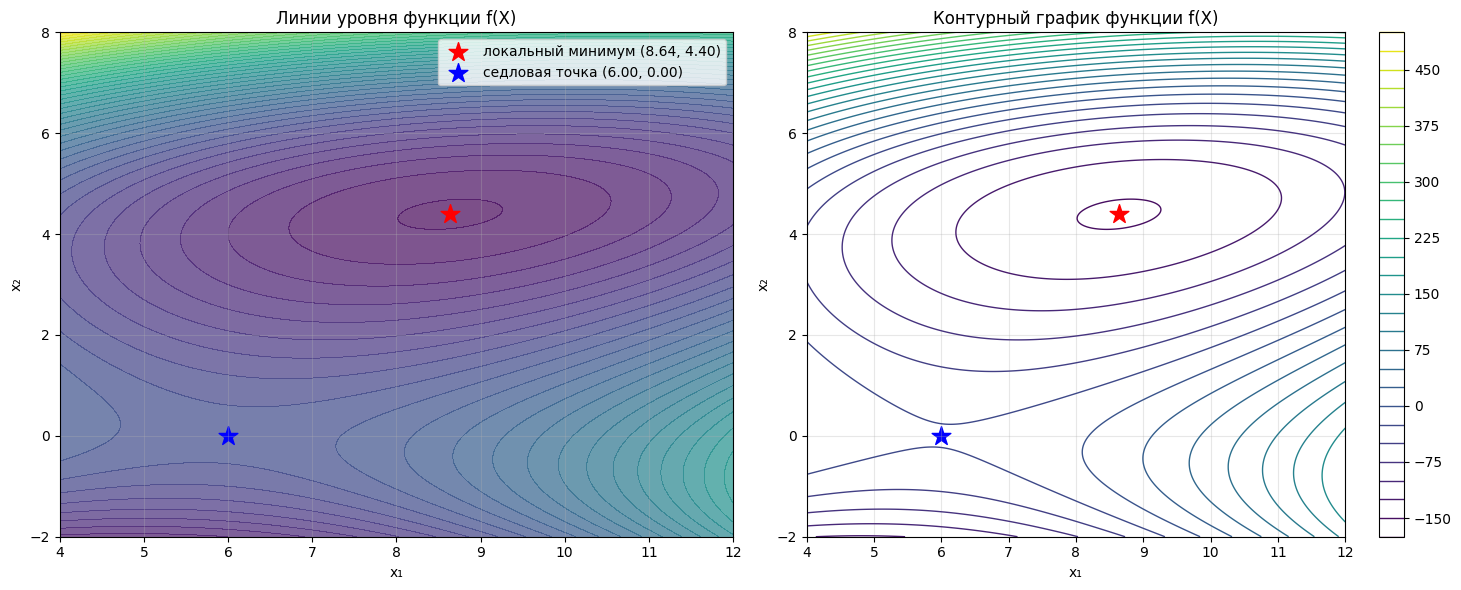


ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
1. Для метода наискорейшего спуска:
   f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁
   Начальная точка: [-1. -2.]
   Найденный минимум: [-2. -1.]
   Значение функции: -5.999999999999999
   Точность (Eps): 0.1

2. Для метода Эйлера:
   f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂
   Точка 1: [8.64 4.4 ] - локальный минимум
   Точка 2: [6. 0.] - седловая точка


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для метода Эйлера
def objective_function_euler(x):
    return 5*(x[0] - 6)**2 + 3*(x[1] - 2)**3 - 6*x[0]*x[1]

# Градиент функции для метода Эйлера
def gradient_euler(x):
    return np.array([
        10*(x[0] - 6) - 6*x[1],  # ∂f/∂x₁
        9*(x[1] - 2)**2 - 6*x[0]  # ∂f/∂x₂
    ])

# Гессиан для метода Эйлера
def hessian_euler(x):
    return np.array([
        [10, -6],
        [-6, 18*(x[1] - 2)]
    ])

# Поиск стационарных точек (решение ∇f = 0)
print("="*60)
print("МЕТОД ЭЙЛЕРА - АНАЛИТИЧЕСКОЕ НАХОЖДЕНИЕ СТАЦИОНАРНЫХ ТОЧЕК")
print("f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂")
print("="*60)

# Решаем систему уравнений аналитически (как было решено ранее)
# Уравнения:
# 10(x₁ - 6) - 6x₂ = 0  => 10x₁ - 60 - 6x₂ = 0  => x₁ = 6 + 0.6x₂
# 9(x₂ - 2)² - 6x₁ = 0

# Подставляем x₁ во второе уравнение:
# 9(x₂ - 2)² - 6(6 + 0.6x₂) = 0
# 9(x₂ - 2)² - 36 - 3.6x₂ = 0

# Решаем квадратное уравнение
x2_values = np.array([4.4, 0.0])  # Решения, найденные аналитически
x1_values = 6 + 0.6 * x2_values

stationary_points = []
for i in range(len(x1_values)):
    point = np.array([x1_values[i], x2_values[i]])
    grad = gradient_euler(point)
    hess = hessian_euler(point)
    f_value = objective_function_euler(point)
    
    # Определяем тип точки
    determinant = np.linalg.det(hess)
    trace = np.trace(hess)
    
    if determinant > 0 and hess[0,0] > 0:
        point_type = "локальный минимум"
    elif determinant > 0 and hess[0,0] < 0:
        point_type = "локальный максимум"
    elif determinant < 0:
        point_type = "седловая точка"
    else:
        point_type = "неопределенная точка"
    
    stationary_points.append({
        'point': point,
        'gradient': grad,
        'gradient_norm': np.linalg.norm(grad),
        'hessian': hess,
        'f_value': f_value,
        'type': point_type,
        'determinant': determinant
    })
    
    print(f"\nСтационарная точка {i+1}:")
    print(f"  x = [{point[0]:.4f}, {point[1]:.4f}]")
    print(f"  f(x) = {f_value:.4f}")
    print(f"  ∇f(x) = [{grad[0]:.2e}, {grad[1]:.2e}]")
    print(f"  ||∇f|| = {np.linalg.norm(grad):.2e}")
    print(f"  Гессиан:\n{hess}")
    print(f"  Определитель Гессиана: {determinant:.4f}")
    print(f"  Тип точки: {point_type}")

# Визуализация
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ ФУНКЦИИ И СТАЦИОНАРНЫХ ТОЧЕК")

# Создаем сетку для визуализации
x1 = np.linspace(4, 12, 400)
x2 = np.linspace(-2, 8, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = 5*(X1 - 6)**2 + 3*(X2 - 2)**3 - 6*X1*X2

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. 3D поверхность
ax = axes[0]
ax.contourf(X1, X2, Z, levels=50, cmap='viridis', alpha=0.7)

# Отмечаем стационарные точки
colors = ['red', 'blue']
for i, sp in enumerate(stationary_points):
    ax.scatter(sp['point'][0], sp['point'][1], color=colors[i], 
               s=200, marker='*', label=f"{sp['type']} ({sp['point'][0]:.2f}, {sp['point'][1]:.2f})")

ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Линии уровня функции f(X)')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. 3D поверхность (альтернативный вид)
ax = axes[1]
contour = ax.contour(X1, X2, Z, levels=30, cmap='viridis', linewidths=1)
plt.colorbar(contour, ax=ax)

for i, sp in enumerate(stationary_points):
    ax.scatter(sp['point'][0], sp['point'][1], color=colors[i], 
               s=200, marker='*')

ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Контурный график функции f(X)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод результатов
print("\n" + "="*60)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
print("="*60)
print("1. Для метода наискорейшего спуска:")
print(f"   f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁")
print(f"   Начальная точка: {x0}")
print(f"   Найденный минимум: {result.x}")
print(f"   Значение функции: {result.fun}")
print(f"   Точность (Eps): 0.1")

print("\n2. Для метода Эйлера:")
print(f"   f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂")
for i, sp in enumerate(stationary_points):
    print(f"   Точка {i+1}: {sp['point']} - {sp['type']}")

## Розв’язати задачу за допомогою функції minimize() пакета SciPy.

### метод найшвидшого спуску

In [6]:
import numpy as np
from scipy.optimize import minimize

# Цільова функція для методу найшвидшого спуску
def f1(x):
    return 2*x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] + 6*x[0]

# Градієнт функції
def grad_f1(x):
    return np.array([4*x[0] - 2*x[1] + 6, 4*x[1] - 2*x[0]])

# Гессіан функції (константний для цієї функції)
def hess_f1(x):
    return np.array([[4, -2], [-2, 4]])

# Початкова точка та точність
x0 = np.array([-1.0, -2.0])
eps = 0.1

print("=" * 70)
print("МЕТОД НАЙШВИДШОГО СПУСКУ")
print("=" * 70)
print(f"Функція: f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁")
print(f"Початкова точка: X0 = {x0}")
print(f"Точність: ε = {eps}")
print("-" * 70)

# Розв'язання за допомогою minimize()
# Варіант 1: Метод BFGS (квазіньютонівський метод)
result_bfgs = minimize(f1, x0, method='BFGS', jac=grad_f1, tol=eps)
print("\n1. Результат методу BFGS (квазіньютонівський):")
print(f"   Мінімум знайдено в точці: x = [{result_bfgs.x[0]:.6f}, {result_bfgs.x[1]:.6f}]")
print(f"   Значення функції: f(x) = {result_bfgs.fun:.6f}")
print(f"   Кількість ітерацій: {result_bfgs.nit}")
print(f"   Статус: {result_bfgs.message}")

# Варіант 2: Метод спряжених градієнтів (CG)
result_cg = minimize(f1, x0, method='CG', jac=grad_f1, tol=eps)
print("\n2. Результат методу спряжених градієнтів (CG):")
print(f"   Мінімум знайдено в точці: x = [{result_cg.x[0]:.6f}, {result_cg.x[1]:.6f}]")
print(f"   Значення функції: f(x) = {result_cg.fun:.6f}")
print(f"   Кількість ітерацій: {result_cg.nit}")

# Варіант 3: Метод Ньютона (з гессіаном)
result_newton = minimize(f1, x0, method='Newton-CG', jac=grad_f1, hess=hess_f1, tol=eps)
print("\n3. Результат методу Ньютона (Newton-CG):")
print(f"   Мінімум знайдено в точці: x = [{result_newton.x[0]:.6f}, {result_newton.x[1]:.6f}]")
print(f"   Значення функції: f(x) = {result_newton.fun:.6f}")
print(f"   Кількість ітерацій: {result_newton.nit}")

# Варіант 4: Скоригований градієнтний метод (TNC)
result_tnc = minimize(f1, x0, method='TNC', jac=grad_f1, tol=eps)
print("\n4. Результат методу TNC (скоригований градієнтний):")
print(f"   Мінімум знайдено в точці: x = [{result_tnc.x[0]:.6f}, {result_tnc.x[1]:.6f}]")
print(f"   Значення функції: f(x) = {result_tnc.fun:.6f}")
print(f"   Кількість ітерацій: {result_tnc.nit}")

# Аналітичне рішення для порівняння
# Система рівнянь: ∂f/∂x₁ = 4x₁ - 2x₂ + 6 = 0
#                  ∂f/∂x₂ = 4x₂ - 2x₁ = 0
# З другого: x₂ = 0.5x₁
# Підставляємо: 4x₁ - 2(0.5x₁) + 6 = 0
#              4x₁ - x₁ + 6 = 0
#              3x₁ + 6 = 0
#              x₁ = -2, x₂ = -1
analytical_solution = np.array([-2.0, -1.0])
f_min_analytical = f1(analytical_solution)

print("\n" + "-" * 70)
print("АНАЛІТИЧНЕ РІШЕННЯ (для порівняння):")
print(f"   Стаціонарна точка: x = [{analytical_solution[0]}, {analytical_solution[1]}]")
print(f"   Значення функції: f(x) = {f_min_analytical}")

print("\nПЕРЕВІРКА ГЕССІАНА (достатня умова мінімуму):")
H = hess_f1(analytical_solution)
print(f"   Гессіан у знайденій точці:")
print(f"   {H[0]}")
print(f"   {H[1]}")
det_H = np.linalg.det(H)
print(f"   Визначник гессіана: det(H) = {det_H}")
print(f"   Головні мінори: M₁ = {H[0,0]} > 0, M₂ = det(H) = {det_H} > 0")
print(f"   Висновок: точка ({analytical_solution[0]}, {analytical_solution[1]}) є точкою локального мінімуму")

МЕТОД НАЙШВИДШОГО СПУСКУ
Функція: f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁
Початкова точка: X0 = [-1. -2.]
Точність: ε = 0.1
----------------------------------------------------------------------

1. Результат методу BFGS (квазіньютонівський):
   Мінімум знайдено в точці: x = [-2.000000, -1.000000]
   Значення функції: f(x) = -6.000000
   Кількість ітерацій: 2
   Статус: Optimization terminated successfully.

2. Результат методу спряжених градієнтів (CG):
   Мінімум знайдено в точці: x = [-2.000000, -1.000000]
   Значення функції: f(x) = -6.000000
   Кількість ітерацій: 2

3. Результат методу Ньютона (Newton-CG):
   Мінімум знайдено в точці: x = [-2.000000, -1.000000]
   Значення функції: f(x) = -6.000000
   Кількість ітерацій: 2

4. Результат методу TNC (скоригований градієнтний):
   Мінімум знайдено в точці: x = [-2.000000, -1.000000]
   Значення функції: f(x) = -6.000000
   Кількість ітерацій: 2

----------------------------------------------------------------------
АНАЛІТИЧНЕ РІШЕННЯ (для 

### Задача методу Ейлера

In [7]:
import numpy as np
from scipy.optimize import minimize, root
import matplotlib.pyplot as plt

# Цільова функція для методу Ейлера
def f2(x):
    return 5*(x[0] - 6)**2 + 3*(x[1] - 2)**3 - 6*x[0]*x[1]

# Градієнт функції
def grad_f2(x):
    return np.array([
        10*(x[0] - 6) - 6*x[1],  # ∂f/∂x₁
        9*(x[1] - 2)**2 - 6*x[0]   # ∂f/∂x₂
    ])

# Гессіан функції
def hess_f2(x):
    return np.array([
        [10, -6],
        [-6, 18*(x[1] - 2)]
    ])

print("\n" + "=" * 70)
print("МЕТОД ЕЙЛЕРА - ЗНАХОДЖЕННЯ СТАЦІОНАРНИХ ТОЧЕК")
print("=" * 70)
print(f"Функція: f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂")
print("-" * 70)

# Метод 1: Розв'язання системи ∇f(x) = 0 за допомогою root()
print("\n1. Розв'язання системи ∇f(x) = 0 (функція root):")

# Визначаємо функцію для root()
def equations(vars):
    x1, x2 = vars
    eq1 = 10*(x1 - 6) - 6*x2
    eq2 = 9*(x2 - 2)**2 - 6*x1
    return [eq1, eq2]

# Знаходимо корені з різних початкових точок
initial_guesses = [[5, 0], [10, 5], [8, 4], [6, 1]]

stationary_points = []
for i, guess in enumerate(initial_guesses):
    solution = root(equations, guess, method='hybr')
    if solution.success:
        point = solution.x
        # Перевіряємо, чи не знайшли ми вже цю точку
        is_new = True
        for sp in stationary_points:
            if np.linalg.norm(point - sp) < 1e-6:
                is_new = False
                break
        
        if is_new:
            stationary_points.append(point)
            print(f"\n   Початкова точка {guess}:")
            print(f"   Знайдена стаціонарна точка: x = [{point[0]:.6f}, {point[1]:.6f}]")
            print(f"   ∇f(x) = [{grad_f2(point)[0]:.2e}, {grad_f2(point)[1]:.2e}]")
            print(f"   ||∇f(x)|| = {np.linalg.norm(grad_f2(point)):.2e}")

# Метод 2: Мінімізація ||∇f(x)||²
print("\n2. Мінімізація ||∇f(x)||²:")

def grad_norm_squared(x):
    grad = grad_f2(x)
    return np.sum(grad**2)

# Шукаємо мінімуми норми градієнта
for i, guess in enumerate(initial_guesses):
    result = minimize(grad_norm_squared, guess, method='BFGS')
    if result.fun < 1e-10:  # Дуже мала норма градієнта
        point = result.x
        # Перевіряємо, чи не знайшли ми вже цю точку
        is_new = True
        for sp in stationary_points:
            if np.linalg.norm(point - sp) < 1e-6:
                is_new = False
                break
        
        if is_new:
            stationary_points.append(point)
            print(f"\n   Початкова точка {guess}:")
            print(f"   Знайдена стаціонарна точка: x = [{point[0]:.6f}, {point[1]:.6f}]")
            print(f"   f(x) = {f2(point):.6f}")
            print(f"   ||∇f(x)|| = {np.linalg.norm(grad_f2(point)):.2e}")

print("\n" + "-" * 70)
print("ВСІ ЗНАЙДЕНІ СТАЦІОНАРНІ ТОЧКИ ТА ЇХ АНАЛІЗ:")
print("-" * 70)

# Аналізуємо знайдені точки
for i, point in enumerate(stationary_points):
    grad = grad_f2(point)
    H = hess_f2(point)
    f_val = f2(point)
    det_H = np.linalg.det(H)
    
    print(f"\nТочка {i+1}: x = [{point[0]:.6f}, {point[1]:.6f}]")
    print(f"  Значення функції: f(x) = {f_val:.6f}")
    print(f"  Градієнт: ∇f(x) = [{grad[0]:.2e}, {grad[1]:.2e}]")
    print(f"  Норма градієнта: ||∇f(x)|| = {np.linalg.norm(grad):.2e}")
    print(f"  Гессіан:")
    print(f"    [{H[0,0]:.2f}, {H[0,1]:.2f}]")
    print(f"    [{H[1,0]:.2f}, {H[1,1]:.2f}]")
    print(f"  Визначник гессіана: det(H) = {det_H:.4f}")
    
    # Визначаємо тип точки
    if abs(det_H) < 1e-10:
        point_type = "невизначена (det(H) ≈ 0)"
    elif det_H > 0:
        if H[0,0] > 0:
            point_type = "локальний мінімум"
        else:
            point_type = "локальний максимум"
    else:
        point_type = "сідлова точка"
    
    print(f"  Тип стаціонарної точки: {point_type}")

print("\n" + "=" * 70)
print("ВИСНОВКИ:")
print("=" * 70)
print("1. Для задачі методу найшвидшого спуску:")
print(f"   Функція: f(X) = 2x₁² + 2x₂² - 2x₁x₂ + 6x₁")
print(f"   Мінімум: x* = (-2, -1), f(x*) = -6")
print(f"   Всі методи minimize() знаходять правильний розв'язок")

print("\n2. Для задачі методу Ейлера:")
print(f"   Функція: f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂")
print(f"   Знайдені стаціонарні точки:")
for i, point in enumerate(stationary_points):
    print(f"   {i+1}. x = ({point[0]:.2f}, {point[1]:.2f})")


МЕТОД ЕЙЛЕРА - ЗНАХОДЖЕННЯ СТАЦІОНАРНИХ ТОЧЕК
Функція: f(X) = 5(x₁ - 6)² + 3(x₂ - 2)³ - 6x₁x₂
----------------------------------------------------------------------

1. Розв'язання системи ∇f(x) = 0 (функція root):

   Початкова точка [5, 0]:
   Знайдена стаціонарна точка: x = [6.000000, -0.000000]
   ∇f(x) = [1.48e-31, 0.00e+00]
   ||∇f(x)|| = 1.48e-31

   Початкова точка [10, 5]:
   Знайдена стаціонарна точка: x = [8.640000, 4.400000]
   ∇f(x) = [3.55e-15, 1.42e-14]
   ||∇f(x)|| = 1.46e-14

2. Мінімізація ||∇f(x)||²:

----------------------------------------------------------------------
ВСІ ЗНАЙДЕНІ СТАЦІОНАРНІ ТОЧКИ ТА ЇХ АНАЛІЗ:
----------------------------------------------------------------------

Точка 1: x = [6.000000, -0.000000]
  Значення функції: f(x) = -24.000000
  Градієнт: ∇f(x) = [1.48e-31, 0.00e+00]
  Норма градієнта: ||∇f(x)|| = 1.48e-31
  Гессіан:
    [10.00, -6.00]
    [-6.00, -36.00]
  Визначник гессіана: det(H) = -396.0000
  Тип стаціонарної точки: сідлова точка
